<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Extremwerte-(Gradient--Hessematrix)" data-toc-modified-id="Extremwerte-(Gradient--Hessematrix)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extremwerte (Gradient  Hessematrix)</a></span><ul class="toc-item"><li><span><a href="#Tangente-an-Flaechen" data-toc-modified-id="Tangente-an-Flaechen-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tangente an Flaechen</a></span></li><li><span><a href="#Gradient-als-Vektorfeld-(quiver)-Hoehenlinien-(contour)" data-toc-modified-id="Gradient-als-Vektorfeld-(quiver)-Hoehenlinien-(contour)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient als Vektorfeld (quiver) Hoehenlinien (contour)</a></span></li></ul></li><li><span><a href="#ebene-parametrische-Plots" data-toc-modified-id="ebene-parametrische-Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ebene parametrische Plots</a></span></li><li><span><a href="#Polygone-(Farbe,-Marker,-Liniendicke)" data-toc-modified-id="Polygone-(Farbe,-Marker,-Liniendicke)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Polygone (Farbe, Marker, Liniendicke)</a></span></li><li><span><a href="#Raumkurven" data-toc-modified-id="Raumkurven-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Raumkurven</a></span></li><li><span><a href="#Code-in-anderen-Sprachen" data-toc-modified-id="Code-in-anderen-Sprachen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Code in anderen Sprachen</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
%matplotlib notebook

# Lektion 11 
## Extremwerte (Gradient  Hessematrix)

In [2]:
x,y,z = symbols('x y z')
var = [x,y,z]

In [3]:
f = exp(x**2+y**2+z**2)

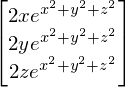

In [4]:
gr = Matrix([f.diff(t) for t in var])
gr

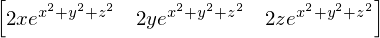

In [5]:
J = Matrix([f]).jacobian(var)
J

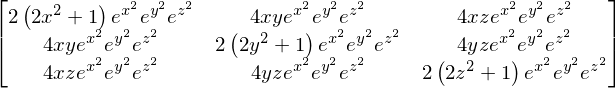

In [6]:
H = factor(gr.jacobian(var))
H

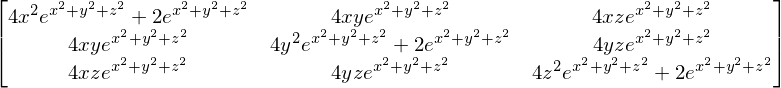

In [7]:
hessian(f,var)

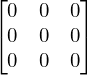

In [8]:
factor(hessian(f,var))-H

In [9]:
f = Function('f')
f(*var)

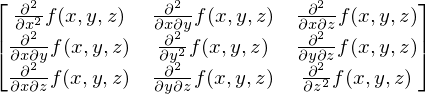

In [10]:
hessian(f(x,y,z),var)

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
f = 1/2 * x**4  - x**2*y**2 - 1/2*y**4 + x**3 -2*x*y**2

In [13]:
fn = lambdify((x,y),f)

In [14]:
gn = np.linspace(-5,5)
X,Y = np.meshgrid(gn,gn)
F = fn(X,Y)

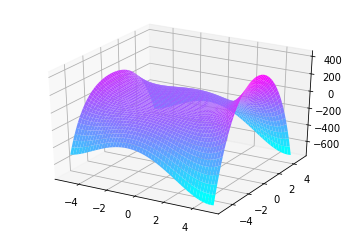

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,F,linewidth=0,cmap=plt.cm.cool);

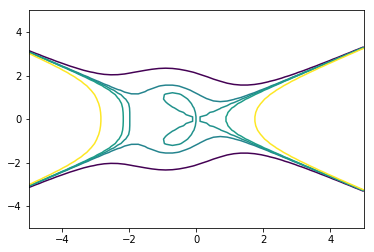

In [16]:
fig = plt.figure()
ax = fig.gca()
ax.contour(X,Y,F,np.array([-10, -1, 0, 1, 10]))

In [17]:
ax.contour?

In [18]:
ext = solve({Eq(f.diff(y),0),Eq(f.diff(x),0)}) # Kandidaten fuer Extrema (grad(f) = 0)

In [19]:
ext

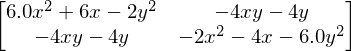

In [20]:
H = hessian(f,(x,y))
H

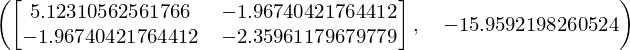

In [21]:
H0 = H.subs(ext[0])
H0, H0.det()

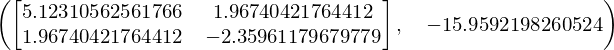

In [22]:
H1 = H.subs(ext[1])
H1, H1.det()

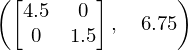

In [23]:
H2 = H.subs(ext[2])
H2, H2.det()

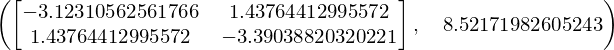

In [24]:
H3 = H.subs(ext[3])
H3, H3.det()

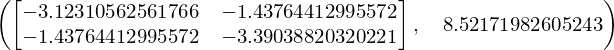

In [25]:
H4 = H.subs(ext[4])
H4, H4.det()

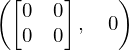

In [26]:
H5 = H.subs(ext[5])
H5, H5.det()

In [27]:
xv = []
yv = []
fv = []
for ex in ext:
    fw = f.subs(ex)
    print('x', ex[x].n(), 'y', ex[y].n(), 'f',fw.n())
    xv.append(ex[x].n())
    yv.append(ex[y].n())
    fv.append(fw.n())

x -1.64038820320221 y -0.768051397498532 f -0.619684349426759
x -1.64038820320221 y 0.768051397498532 f -0.619684349426759
x -1.50000000000000 y 0 f -0.843750000000000
x -0.609611796797792 y -0.920650341226544 f 0.201715599426759
x -0.609611796797792 y 0.920650341226544 f 0.201715599426759
x 0 y 0 f 0


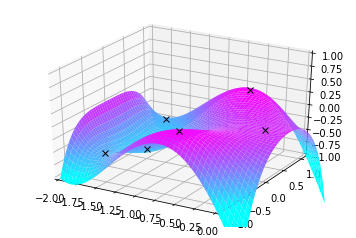

In [28]:
from matplotlib.colors import Normalize
norm = Normalize(-1,0.2)
xn = np.linspace(-2,0.3)
yn = np.linspace(-1.2,1.2)
X,Y = np.meshgrid(xn,yn)
F = fn(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,F,linewidth=0,cmap=plt.cm.cool,norm=norm)
ax.plot3D(xv,yv,fv,'kx')
ax.set_ylim(-1.2,1.1)
ax.set_xlim(-2,0)
ax.set_zlim(-1,1);

### Tangente an Flaechen

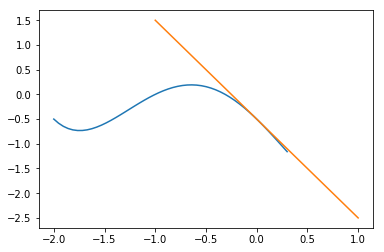

In [29]:
plt.figure()
xt = np.linspace(-1,1)
plt.plot(xn,fn(xn,-1))
tangent = lambda xt: fn(0,-1) + f.diff(x).subs({x:0,y:-1})*xt
plt.plot(xt,tangent(xt));

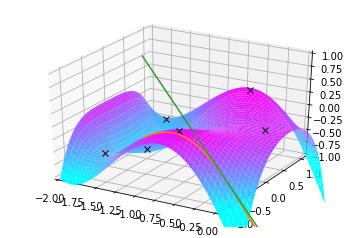

In [30]:
from matplotlib.colors import Normalize
norm = Normalize(-1,0.2)
xn = np.linspace(-2,0.3)
yn = np.linspace(-1.2,1.2)
X,Y = np.meshgrid(xn,yn)
F = fn(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,F,linewidth=0,cmap=plt.cm.cool,norm=norm)
ax.plot3D(xv,yv,fv,'kx')
ax.set_ylim(-1.2,1.1)
ax.set_xlim(-2,0)
ax.set_zlim(-1,1)
ax.plot(xt,0*xt-1,fn(xt,-1))
ax.plot(xt,0*xt-1,tangent(xt))

### Gradient als Vektorfeld (quiver) Hoehenlinien (contour)

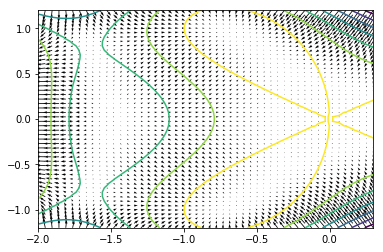

In [31]:
grad = Matrix([f]).jacobian([x,y])
gradf = lambdify((x,y),grad)
GR = gradf(X,Y)[0]
M = np.sqrt(GR[0]**2+GR[1]**2)
plt.figure()
plt.contour(X,Y,F)
plt.quiver(X,Y,GR[0],GR[1])

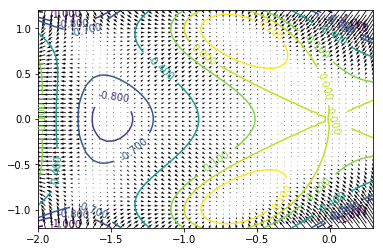

In [32]:
grad = Matrix([f]).jacobian([x,y])
gradf = lambdify((x,y),grad)
GR = gradf(X,Y)[0]
M = np.sqrt(GR[0]**2+GR[1]**2)
plt.figure()
cs = plt.contour(X,Y,F,np.array([-1,-.8,-.7,-.4,-.1,0,.1]))
plt.clabel(cs)
plt.quiver(X,Y,GR[0],GR[1]);

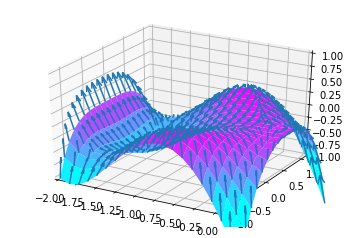

In [33]:
from matplotlib.colors import Normalize
norm = Normalize(-1,0.2,)
xn = np.linspace(-2,0.3,20)
yn = np.linspace(-1.2,1.2,20)
X,Y = np.meshgrid(xn,yn)
F = fn(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,F,linewidth=0,cmap=plt.cm.cool,norm=norm)
ax.set_ylim(-1.2,1.1)
ax.set_xlim(-2,0)
ax.set_zlim(-1,1)
GR = gradf(X,Y)[0]
nG = np.sqrt(GR[0,:,:]**2 + GR[1,:,:]**2)
ax.quiver(X,Y,F,GR[0,:,:]/nG,GR[1,:,:]/nG,np.sqrt(1+nG**2),length=0.1);

## ebene parametrische Plots

In [34]:
tn = np.linspace(-np.pi,np.pi,1000)

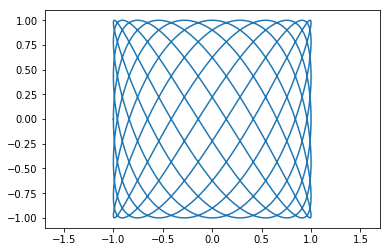

In [35]:
plt.figure()
plt.plot(np.cos(7*tn),np.sin(11*tn));
plt.axis('equal')

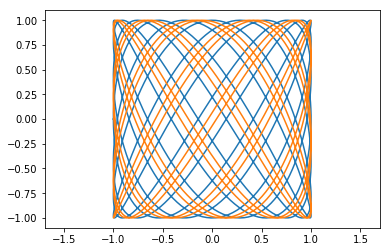

In [36]:
plt.figure()
plt.plot(np.cos(7*tn),np.sin(11*tn));
plt.plot(np.cos(7*tn+0.1),np.sin(11*tn));
plt.axis('equal')

## Polygone (Farbe, Marker, Liniendicke)

In [37]:
dreieck = np.array([[0,0],[1,0],[0,1],[0,0]])

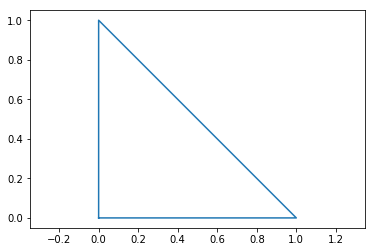

In [38]:
plt.figure()
plt.plot(dreieck[:,0],dreieck[:,1])
plt.axis('equal')

In [39]:
def n_eck(n):
    x = [np.sin(2*np.pi*j/n) for j in range(n+1)]
    y = [np.cos(2*np.pi*j/n) for j in range(n+1)]
    return x, y

In [40]:
x,y  = n_eck(5)
plt.figure()
plt.plot(x,y)
plt.axis('equal');

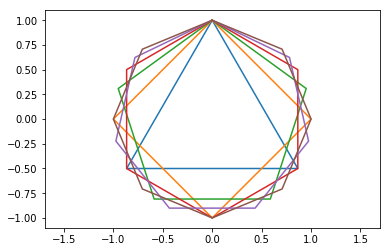

In [41]:
plt.figure()
for n in range(3,9):
    plt.plot(*n_eck(n))
plt.axis('equal')

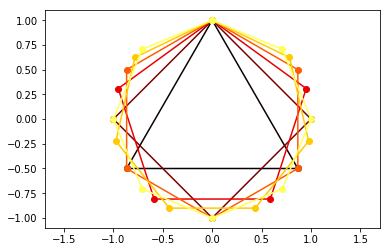

In [42]:
plt.figure()
for n in range(3,9):
    x,y = n_eck(n)
    farbe = plt.cm.hot((n-3)/6)
    plt.plot(x,y,'o-',color=farbe)
plt.axis('equal');


In [43]:
x =symbols('x')
f = 1/7*(-x)**(3/2)* ( (3/2)**(sqrt(-x))-floor((3/2)**(sqrt(-x))))

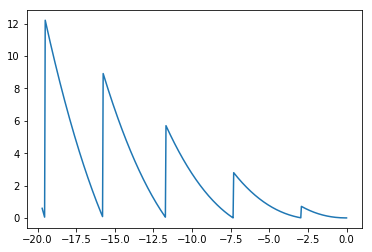

In [44]:
fn = lambdify(x,f)
xn = np.linspace(-19.7,0,500)
plt.figure()
plt.plot(xn,fn(xn));

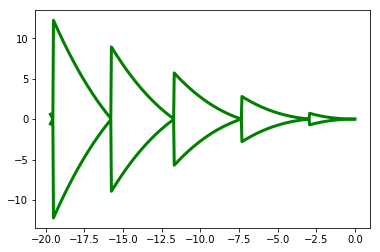

In [45]:
plt.figure()
plt.plot(xn,fn(xn),xn,-fn(xn),linewidth=3,color='green');

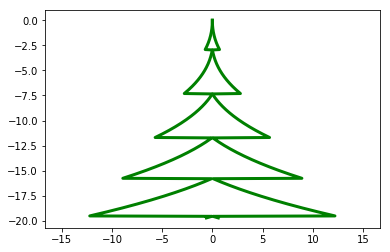

In [46]:
plt.figure()
plt.plot(fn(xn),xn,-fn(xn),xn,linewidth=3,color='green');
plt.axis('equal');

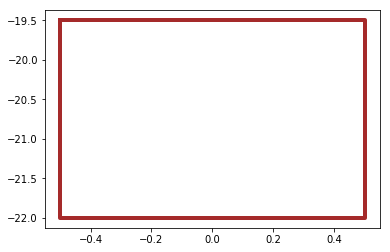

In [47]:
plt.plot([-.5,.5,.5,-.5,-.5],[-19.5,-19.5,-22,-22,-19.5],color='brown',linewidth='4');

In [48]:
def n_stern(n):
    x = [(0.5+ j % 2)*np.sin(np.pi*2*j/n) for j in range(2*n+1)]
    y = [(0.5+ j % 2)*np.cos(np.pi*2*j/n) for j in range(2*n+1)]
    return x ,y

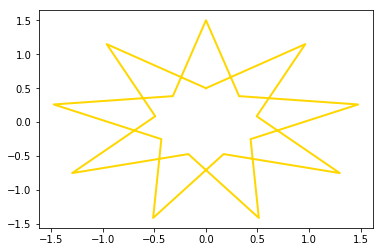

In [49]:
x,y = n_stern(9)
plt.plot(x,y,color='gold',linewidth=2);

## Raumkurven

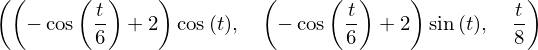

In [50]:
t = symbols('t')
x = (2-cos(t/6))*cos(t)
y = (2-cos(t/6))*sin(t)
z = t/8
x,y,z

In [51]:
xf = lambdify(t,x)
yf = lambdify(t,y)
zf = lambdify(t,z)
tn = np.linspace(-6*np.pi,6*np.pi,200)
xn = xf(tn)
yn = yf(tn)
zn = zf(tn)

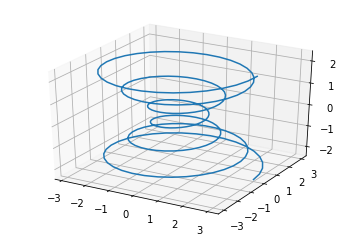

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xn,yn,zn);

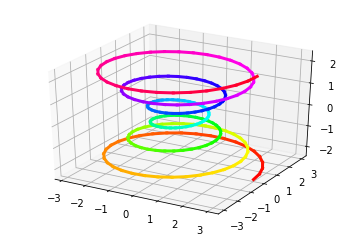

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(tn)-1):
    ax.plot(xn[i:i+2],yn[i:i+2],zn[i:i+2], color =plt.cm.hsv(float(i)/len(tn)),linewidth=3)
    
# von stackoverflow 15617207 line colour of 3d parametric curve

In [54]:
t = symbols('t')
x = (5+cos(21*t))*cos(2*t)
y = (5+cos(21*t))*sin(2*t)
z = sin(21*t)
xf = lambdify(t,x)
yf = lambdify(t,y)
zf = lambdify(t,z)
tn = np.linspace(0,2*np.pi,1000)
xn = xf(tn)
yn = yf(tn)
zn = zf(tn)

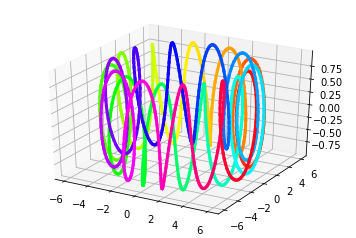

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(tn)-1):
    ax.plot(xn[i:i+2],yn[i:i+2],zn[i:i+2], color =plt.cm.hsv(float(i)/len(tn)),linewidth=3)

## Code in anderen Sprachen

In [56]:
x,y = symbols('x y')

In [57]:
f = log(x)*sqrt(x**2+y**2)

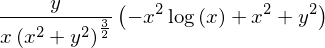

In [58]:
df = f.diff(x,y).simplify()
df

In [59]:
octave_code(df)  # Octave oder Matlabcode

'y.*(-x.^2.*log(x) + x.^2 + y.^2)./(x.*(x.^2 + y.^2).^(3/2))'

In [60]:
ccode(df)

'y*(-pow(x, 2)*log(x) + pow(x, 2) + pow(y, 2))/(x*pow(pow(x, 2) + pow(y, 2), 3.0L/2.0L))'

In [61]:
fcode(df)

'      y*(-x**2*log(x) + x**2 + y**2)/(x*(x**2 + y**2)**(3.0d0/2.0d0))'

In [62]:
print(latex(df))

\frac{y}{x \left(x^{2} + y^{2}\right)^{\frac{3}{2}}} \left(- x^{2} \log{\left (x \right )} + x^{2} + y^{2}\right)
